In [4]:
import pandas
import sklearn
import numpy as np
import pandas as pd

First we load the soil data and do some cleaning

In [5]:
df = pandas.read_csv('../data/ProtectedData/01_raw_data/4 Soil Data 2015-19/Kenya_Soil Samples _2015_2019.csv')

In [13]:
df

Pseudo_ID Sample No Farm            Village           Ward Subcouny  \
0            1     B-001   MF            Sinagwe  West Sang'alo  Kanduyi   
1            2    B-001P   PS          Kikwech B         Siboti   Bumula   
2            3     B-002   MF  Topolia/Ndengelwa   Bukembe West  Kanduyi   
3            4     B-003   MF          Kikwech B         Siboti   Bumula   
4            5     B-004   MF             Ng'oli        Namwela  Sirisia   
..         ...       ...  ...                ...            ...      ...   
178        179     S-049   MF               Jera   North Ugenya   Ugenya   
179        180     S-050   MF            Funtula   North Ugenya   Ugenya   
180        181     S-051   MF            Siwinga         Ukwala   Ugenya   
181        182     S-052   MF            Siranga         Ukwala   Ugenya   
182        183     S-053   MF             Ndenga    West Ugenya   Ugenya   

      County  cluster_lat  cluster_lon  Cluster  ... AgricLimekg  Compostkg  \
0    Bungoma     0.512082    34.600875      350  ...       800.0        NaN   
1    Bungoma     0.671842    34.510808      292  ...         0.0        NaN   
2    Bungoma     0.563777    34.580260      385  ...       250.0        NaN   
3    Bungoma     0.671842    34.510808      292  ...         0.0        NaN   
4    Bungoma     0.782670    34.560231       38  ...       250.0        NaN   
..       ...          ...          ...      ...  ...         ...        ...   
178    Siaya     0.283016    34.260842      144  ...      1400.0      11332   
179    Siaya     0.269392    34.235531      113  ...       400.0        324   
180    Siaya     0.214815    34.197528      374  ...       100.0        162   
181    Siaya     0.184228    34.203175      342  ...       350.0       2752   
182    Siaya     0.184228    34.203175      342  ...       800.0       1781   

     Claygkg Sandgkg  Target_yield  Suit_potatoes  Suit_Beans  Suit_Grains  \
0      200.0   620.0           NaN            NaN         NaN          NaN   
1      320.0   550.0           NaN            NaN         NaN          NaN   
2      350.0   490.0           NaN            NaN         NaN          NaN   
3      140.0   680.0           NaN            NaN         NaN          NaN   
4      670.0   110.0           NaN            NaN         NaN          NaN   
..       ...     ...           ...            ...         ...          ...   
178      NaN     NaN       39600.0            1.0         1.0          1.0   
179      NaN     NaN         400.0            1.0         0.0          0.0   
180      NaN     NaN         700.0            1.0         0.0          0.0   
181      NaN     NaN        9800.0            1.0         1.0          1.0   
182      NaN     NaN         900.0            1.0         0.0          0.0   

     Suit_veges  Counter  
0           NaN      1.0  
1           NaN      1.0  
2           NaN      1.0  
3           NaN      1.0  
4           NaN      1.0  
..          ...      ...  
178         0.0      NaN  
179         0.0      NaN  
180         0.0      NaN  
181         0.0      NaN  
182         0.0      NaN  

[183 rows x 36 columns]

In [14]:
## 1. Average the clusters together

In [15]:
measurements = ['cluster_lat', 'cluster_lon', 'pH_2015', 'pH_2019',
       'Cgkg_2015', 'Cgkg_2019', 'Ngkg', 'Pgkg', 'Kmmol+kg', 'Cammol+/kg',
       'Mgmmol+kg', 'ZN mgkg', 'Cumgkg', 'CECmmol+kg', 'AgricLimekg',
       'Compostkg', 'Claygkg', 'Sandgkg', 'Target_yield', 'Suit_potatoes',
       'Suit_Beans', 'Suit_Grains', 'Suit_veges', 'Counter']
important_measurements = ['cluster_lat', 'cluster_lon', 'pH_2015', 'pH_2019',
       'Cgkg_2015', 'Cgkg_2019', 'Ngkg', 'Pgkg', 'Kmmol+kg', 'Cammol+/kg']
values_to_transfer = ['pH_2015', 'pH_2019',
       'Cgkg_2015', 'Cgkg_2019', 'Ngkg', 'Pgkg', 'Kmmol+kg', 'Cammol+/kg']

In [16]:
df[important_measurements]

cluster_lat  cluster_lon  pH_2015  pH_2019  Cgkg_2015  Cgkg_2019  Ngkg  \
0       0.512082    34.600875      4.6      5.0       14.4       18.9  0.89   
1       0.671842    34.510808      6.1      6.5       21.1       25.6  1.91   
2       0.563777    34.580260      4.7      5.1       11.0       16.5  0.97   
3       0.671842    34.510808      5.7      6.1        7.8       13.3  0.65   
4       0.782670    34.560231      5.1      5.5       34.5       39.0  2.69   
..           ...          ...      ...      ...        ...        ...   ...   
178     0.283016    34.260842      4.8      5.2       11.0       16.5  0.90   
179     0.269392    34.235531      4.6      5.0       17.4       21.9  1.20   
180     0.214815    34.197528      4.5      4.9       11.2       16.7  1.00   
181     0.184228    34.203175      4.8      5.2       10.7       16.2  0.70   
182     0.184228    34.203175      4.7      5.1       15.8       20.3  1.10   

     Pgkg  Kmmol+kg  Cammol+/kg  
0     1.5       1.7        14.0  
1     5.1       3.4        72.0  
2     1.0       1.3         3.0  
3     4.2       2.4        34.0  
4    11.4       5.7        66.0  
..    ...       ...         ...  
178   0.3       3.7        23.7  
179   0.6       7.8        64.2  
180   0.5       9.4        47.2  
181   0.5      12.3        36.9  
182   0.4       8.9       142.7  

[183 rows x 10 columns]

In [17]:
clusterids = df['Cluster'].unique()

In [18]:
id=1
df[df['Cluster']==292][measurements]

cluster_lat  cluster_lon  pH_2015  pH_2019  Cgkg_2015  Cgkg_2019  Ngkg  \
1     0.671842    34.510808      6.1      6.5       21.1       25.6  1.91   
3     0.671842    34.510808      5.7      6.1        7.8       13.3  0.65   

   Pgkg  Kmmol+kg  Cammol+/kg  ...  AgricLimekg  Compostkg Claygkg  Sandgkg  \
1   5.1       3.4        72.0  ...          0.0        NaN   320.0    550.0   
3   4.2       2.4        34.0  ...          0.0        NaN   140.0    680.0   

   Target_yield Suit_potatoes  Suit_Beans  Suit_Grains  Suit_veges  Counter  
1           NaN           NaN         NaN          NaN         NaN      1.0  
3           NaN           NaN         NaN          NaN         NaN      1.0  

[2 rows x 24 columns]

In [19]:
meanlist = []
for this_id in clusterids:
    means = df[df['Cluster']==this_id][important_measurements].mean()
    means['Cluster'] = this_id
    meanlist.append(list(means))
    #print(means)


In [46]:
dfmeans = pandas.DataFrame(meanlist, columns=important_measurements + ['Cluster'])

In [48]:
dfmeans.mean()

cluster_lat      0.364444
cluster_lon     34.572490
pH_2015          4.820766
pH_2019          5.220766
Cgkg_2015       15.550000
Cgkg_2019       20.340995
Ngkg             1.212527
Pgkg             1.817204
Kmmol+kg         4.475874
Cammol+/kg      50.401075
Cluster        206.016129
dtype: float64

In [47]:
df[['Cluster'] + important_measurements].groupby(by = 'Cluster').mean()

cluster_lat     0.364444
cluster_lon    34.572490
pH_2015         4.820766
pH_2019         5.220766
Cgkg_2015      15.550000
Cgkg_2019      20.340995
Ngkg            1.212527
Pgkg            1.817204
Kmmol+kg        4.475874
Cammol+/kg     50.401075
dtype: float64

Now we load the other data that we want to label. Now checking smoothness of the variables

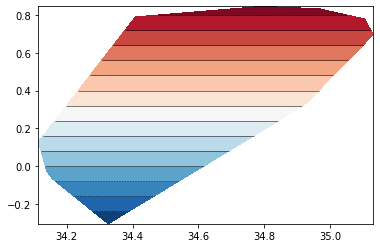

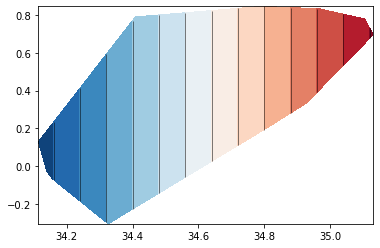

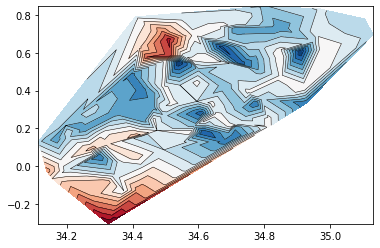

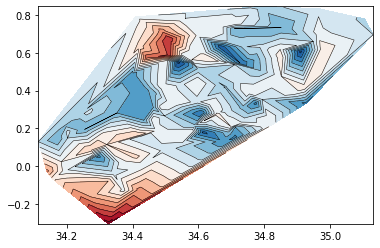

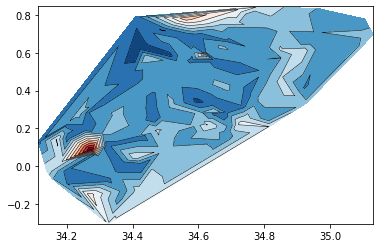

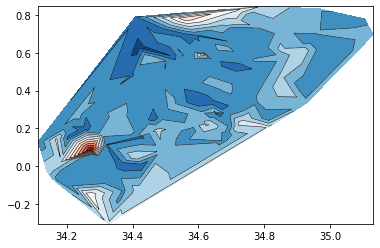

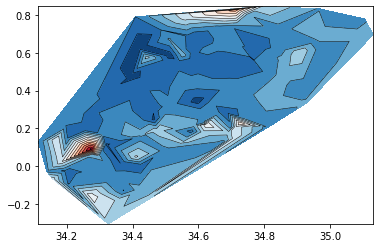

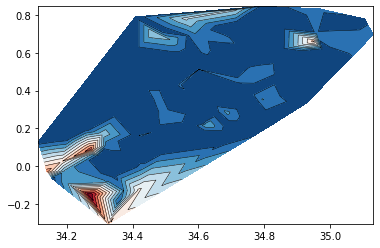

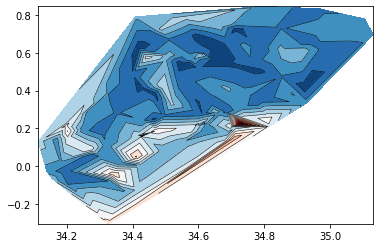

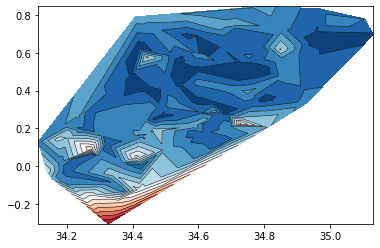

In [22]:
import matplotlib.pyplot as plt
import matplotlib.tri as tri

for i in important_measurements:
    fig, ax = plt.subplots()
    x = dfmeans['cluster_lon']
    y = dfmeans['cluster_lat']
    z = dfmeans[i]
    ax.tricontour(x, y, z, levels=14, linewidths=0.5, colors='k')
    cntr2 = ax.tricontourf(x, y, z, levels=14, cmap="RdBu_r")

In [23]:
# Train the Gaussian Process Regessor

In [31]:
dfmeans['cluster_lon']

0      34.600875
1      34.510808
2      34.580260
3      34.560231
4      34.463105
         ...    
119    34.415784
120    34.352456
121    34.235531
122    34.197528
123    34.203175
Name: cluster_lon, Length: 124, dtype: float64

In [24]:
import numpy as np
from sklearn.gaussian_process import GaussianProcessRegressor


x = dfmeans['cluster_lon']
y = dfmeans['cluster_lat']
points = np.vstack([x.to_numpy(), y.to_numpy()]).T

GP_Regressors = {}
for key in values_to_transfer:

    z = dfmeans[key].to_numpy()

    GP = GaussianProcessRegressor(random_state=42)
    GP.fit(points, z)
    
    GP_Regressors[key] = GP

In [25]:
GP_Regressors

{'pH_2015': GaussianProcessRegressor(random_state=42),
 'pH_2019': GaussianProcessRegressor(random_state=42),
 'Cgkg_2015': GaussianProcessRegressor(random_state=42),
 'Cgkg_2019': GaussianProcessRegressor(random_state=42),
 'Ngkg': GaussianProcessRegressor(random_state=42),
 'Pgkg': GaussianProcessRegressor(random_state=42),
 'Kmmol+kg': GaussianProcessRegressor(random_state=42),
 'Cammol+/kg': GaussianProcessRegressor(random_state=42)}

In [26]:
# Now we evaluate all those regessors on the new datasurveys

In [27]:
data_paths = [
    '../data/ProtectedData/01_raw_data/1 Adoption Survey 2020/Bungoma Application - Adoption Survey 2020_WIDE.csv', 
    '../data/ProtectedData/01_raw_data/1 Adoption Survey 2020/Kakamega Application - Adoption Survey 2020_WIDE.csv',
    '../data/ProtectedData/01_raw_data/1 Adoption Survey 2020/Siaya Application - Adoption Survey 2020.csv',
    '../data/ProtectedData/01_raw_data/2 Yield Data Maize 2018-19/2018/maize yield assessment_July 2018 dataset.csv',
    '../data/ProtectedData/01_raw_data/2 Yield Data Maize 2018-19/2019/Maize yield assessment _July_Aug2019 dataset.csv',
    '../data/ProtectedData/01_raw_data/3 Yield Data Beans 2018-19/2018/Beans assessment dataset _Dec 2018.csv',
    '../data/ProtectedData/01_raw_data/3 Yield Data Beans 2018-19/2019/Beans assessment dataset _July 2019.csv',
    '../data/ProtectedData/01_raw_data/3 Yield Data Beans 2018-19/2019/Beans ass dataset _Dec 2019.csv'
]

In [28]:
"""
path = data_paths[3]

preddf = pandas.read_csv(path)
xpred = preddf['cluster_lon']
ypred = preddf['cluster_lat']
xmask = xpred.isnull()
ymask = ypred.isnull()
mask = (~xmask)*(~ymask)
points = np.vstack([xpred.to_numpy(), ypred.to_numpy()]).T
mpoints = points[mask]


value_key = 'pH_2015'

pred_value = np.empty(xpred.shape)
pred_value[:] = np.nan
m_pred_value = GP_Regressors[value_key].predict(mpoints)
pred_value[mask] = m_pred_value
preddf[value_key] = pred_value


outpath = path.split('.csv')[0] + '_withSoil.csv'
preddf.to_csv(outpath, sep=',')
"""

In [49]:
GaussianProcessRegressor.predict


AttributeError: 'dict' object has no attribute 'predict'

In [29]:
for path in data_paths:
    preddf = pandas.read_csv(path)
    xpred = preddf['cluster_lon']
    ypred = preddf['cluster_lat']
    xmask = xpred.isnull()
    ymask = ypred.isnull()
    mask = (~xmask)*(~ymask)
    points = np.vstack([xpred.to_numpy(), ypred.to_numpy()]).T
    mpoints = points[mask]
    
    
    for value_key in values_to_transfer:
        pred_value = np.empty(xpred.shape)
        pred_value[:] = np.nan
        m_pred_value = GP_Regressors[value_key].predict(mpoints)
        pred_value[mask] = m_pred_value
        preddf[value_key] = pred_value

    outpath = path.split('.csv')[0] + '_withSoil.csv'
    preddf.to_csv(outpath, sep=',')